<a href="https://colab.research.google.com/github/paulbosson/pbis601/blob/main/Copy_of_Credit_Card_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls
df = pd.read_excel('default of credit card clients.xls', header=1)  # adjust header parameter based on file structure
print(df.head())

--2024-04-22 00:07:34--  https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘default of credit card clients.xls’

default of credit c     [            <=>     ]   5.28M   442KB/s    in 9.9s    

2024-04-22 00:07:44 (549 KB/s) - ‘default of credit card clients.xls’ saved [5539328]

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1        

In [ ]:
df.describe()
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Distribution of Target Variable


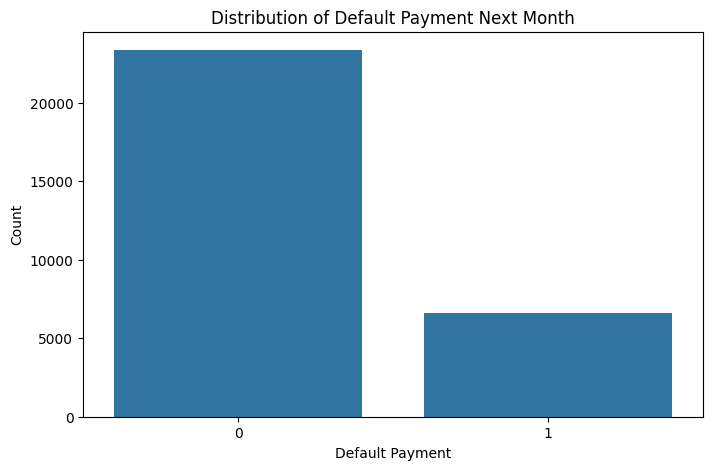

In [ ]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='default payment next month', data=df)
plt.title('Distribution of Default Payment Next Month')
plt.xlabel('Default Payment')
plt.ylabel('Count')
plt.show()


Summary Statistics and Distributions of Numerical Features

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


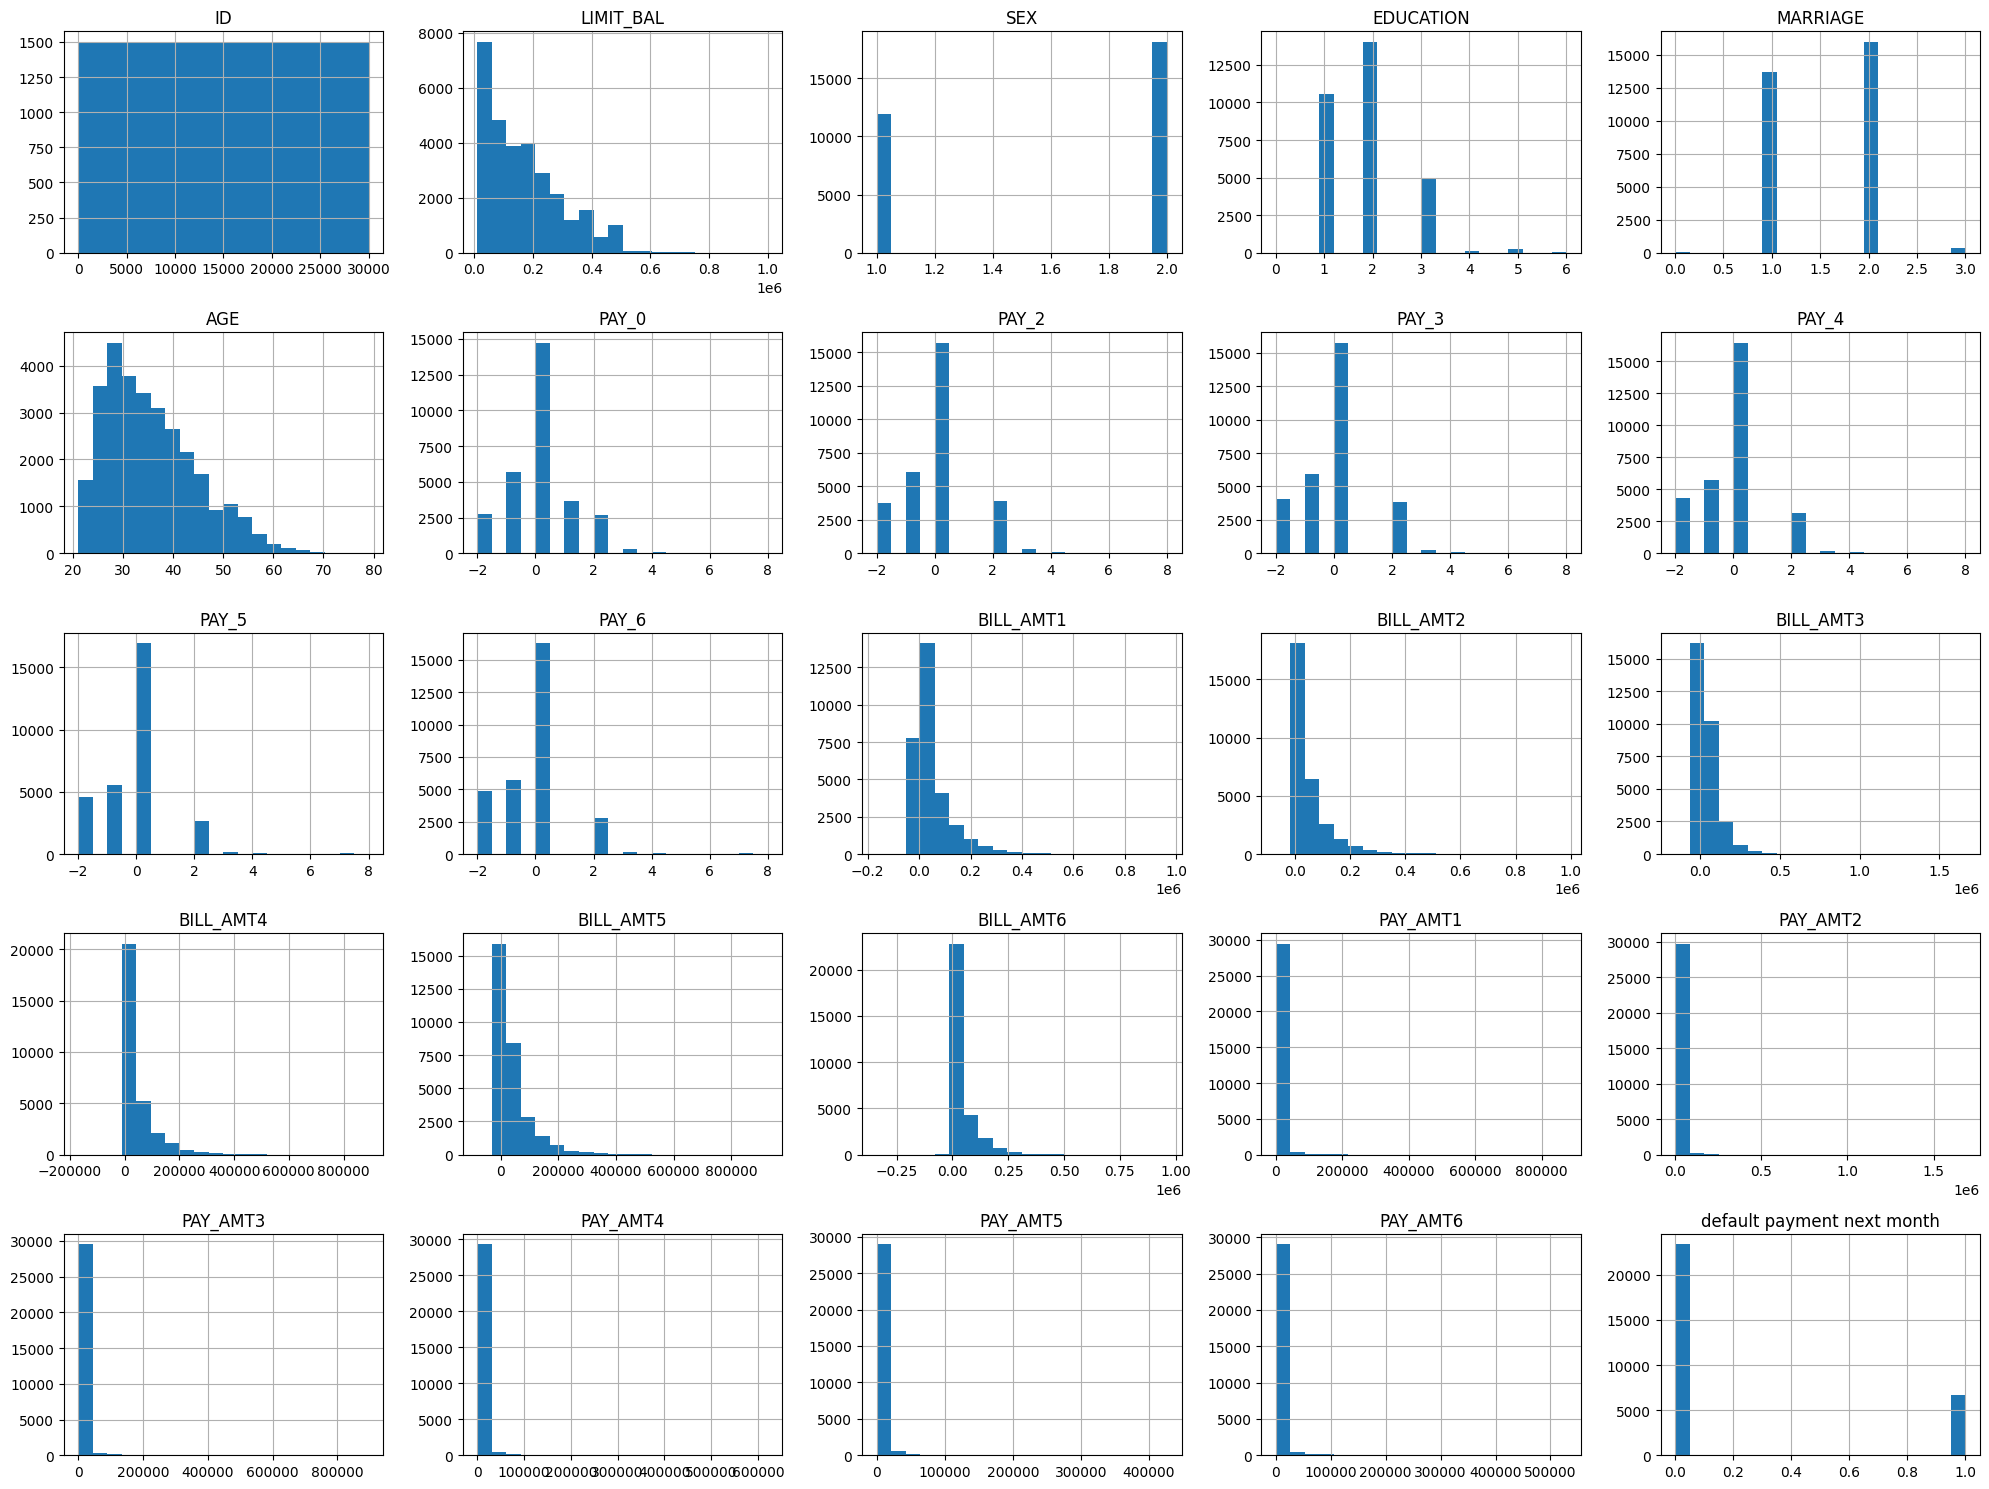

In [ ]:
# Display summary statistics
display(df.describe())

# Histograms for all numerical features
df.hist(figsize=(20, 15), bins=20)
plt.tight_layout()
plt.show()


Correlation Matrix

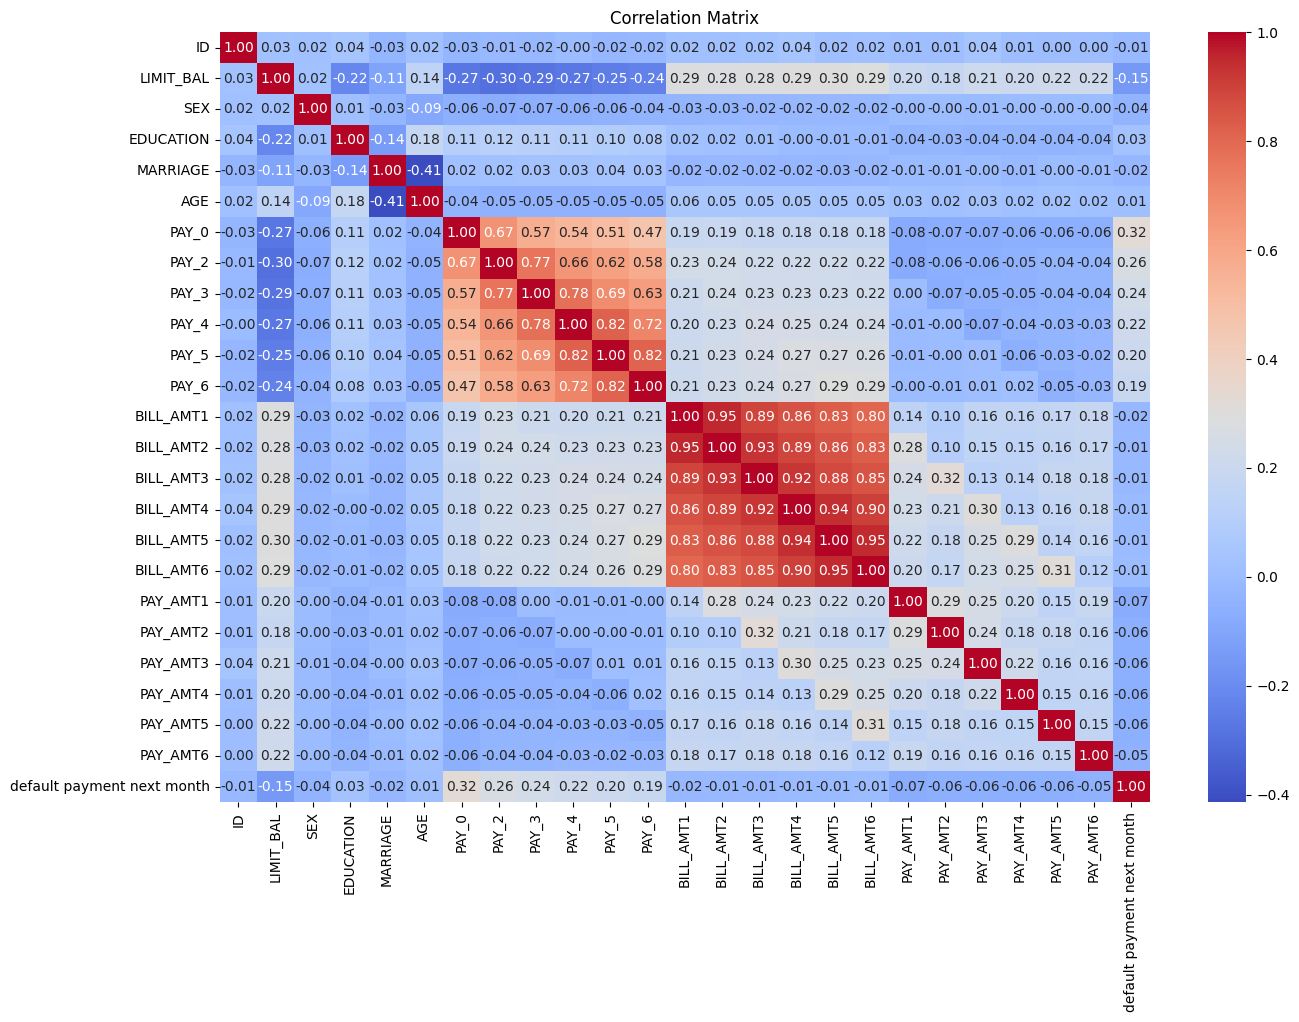

In [ ]:
# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Box Plots for Categorical Variables

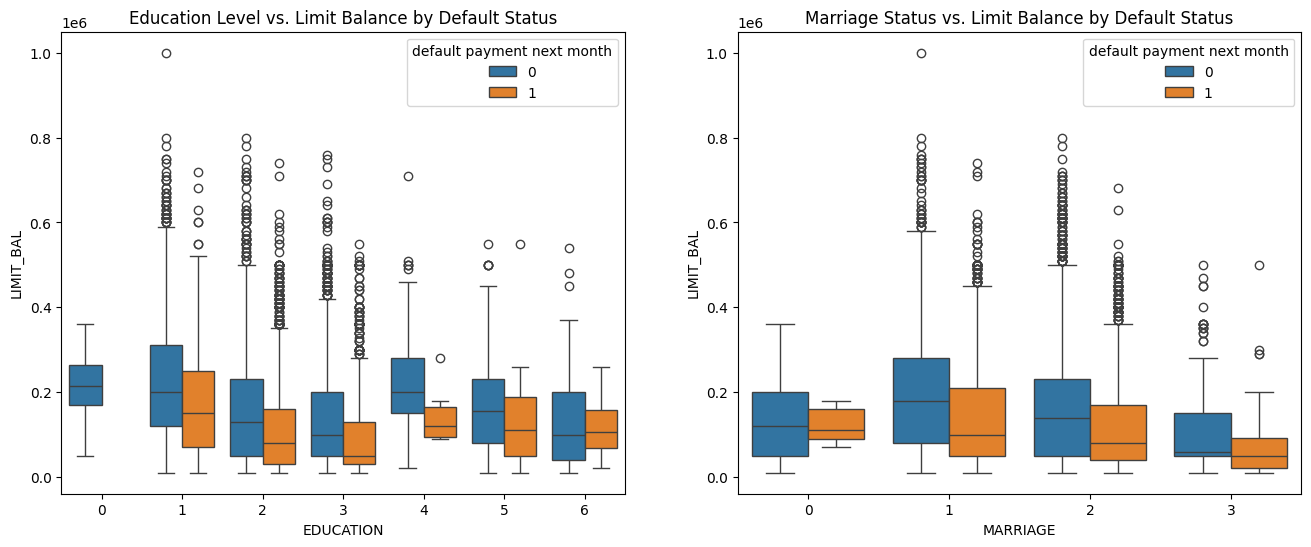

In [ ]:
# Box plots for categorical variables like EDUCATION and MARRIAGE against the target
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x='EDUCATION', y='LIMIT_BAL', hue='default payment next month', data=df, ax=ax[0])
ax[0].set_title('Education Level vs. Limit Balance by Default Status')

sns.boxplot(x='MARRIAGE', y='LIMIT_BAL', hue='default payment next month', data=df, ax=ax[1])
ax[1].set_title('Marriage Status vs. Limit Balance by Default Status')

plt.show()


Feature Relationships

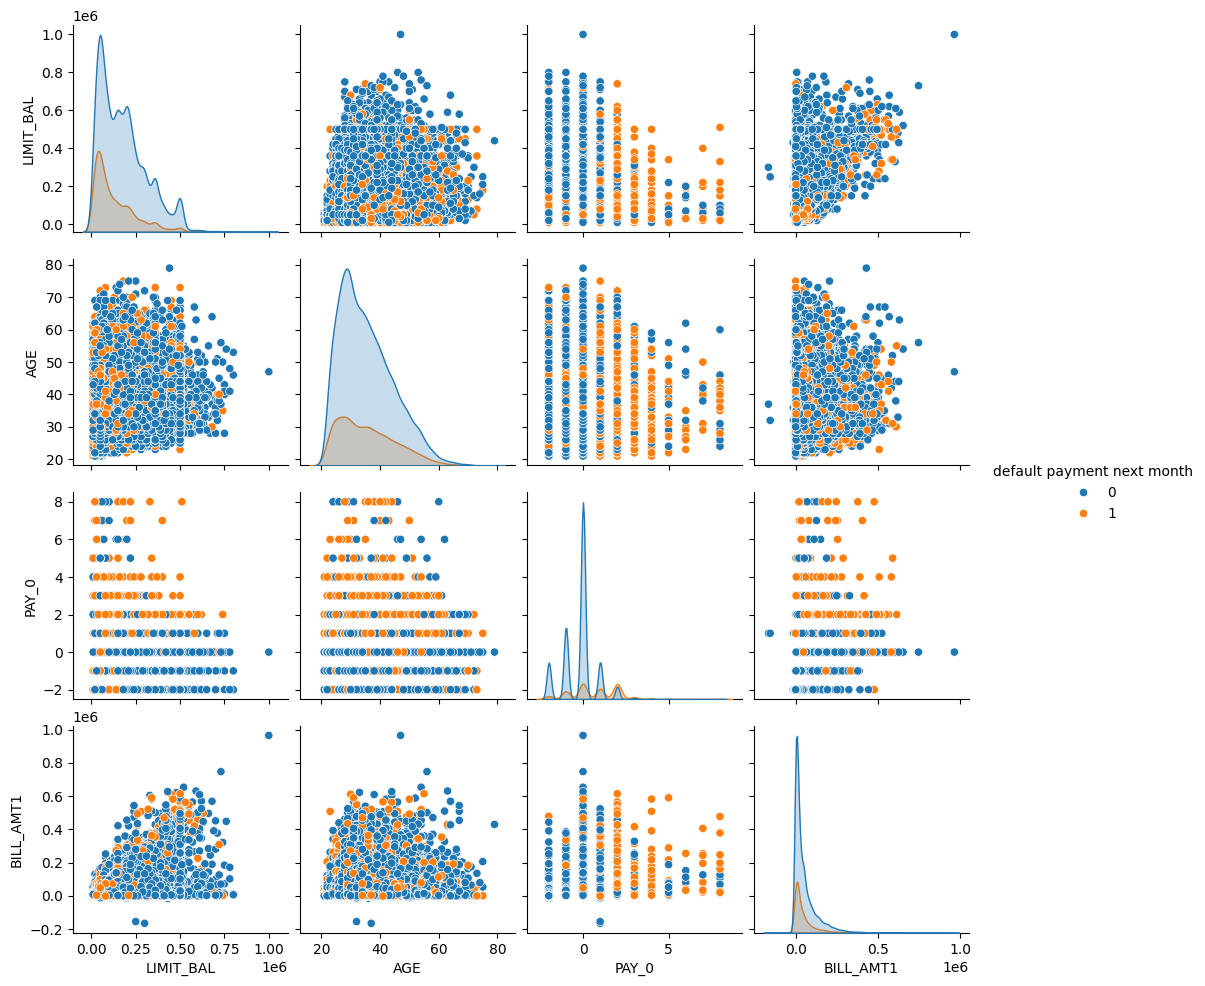

In [ ]:
# Pair plot for selected features
sns.pairplot(df[['LIMIT_BAL', 'AGE', 'PAY_0', 'BILL_AMT1', 'default payment next month']], hue='default payment next month')
plt.show()


Analysis of PAY_X Features

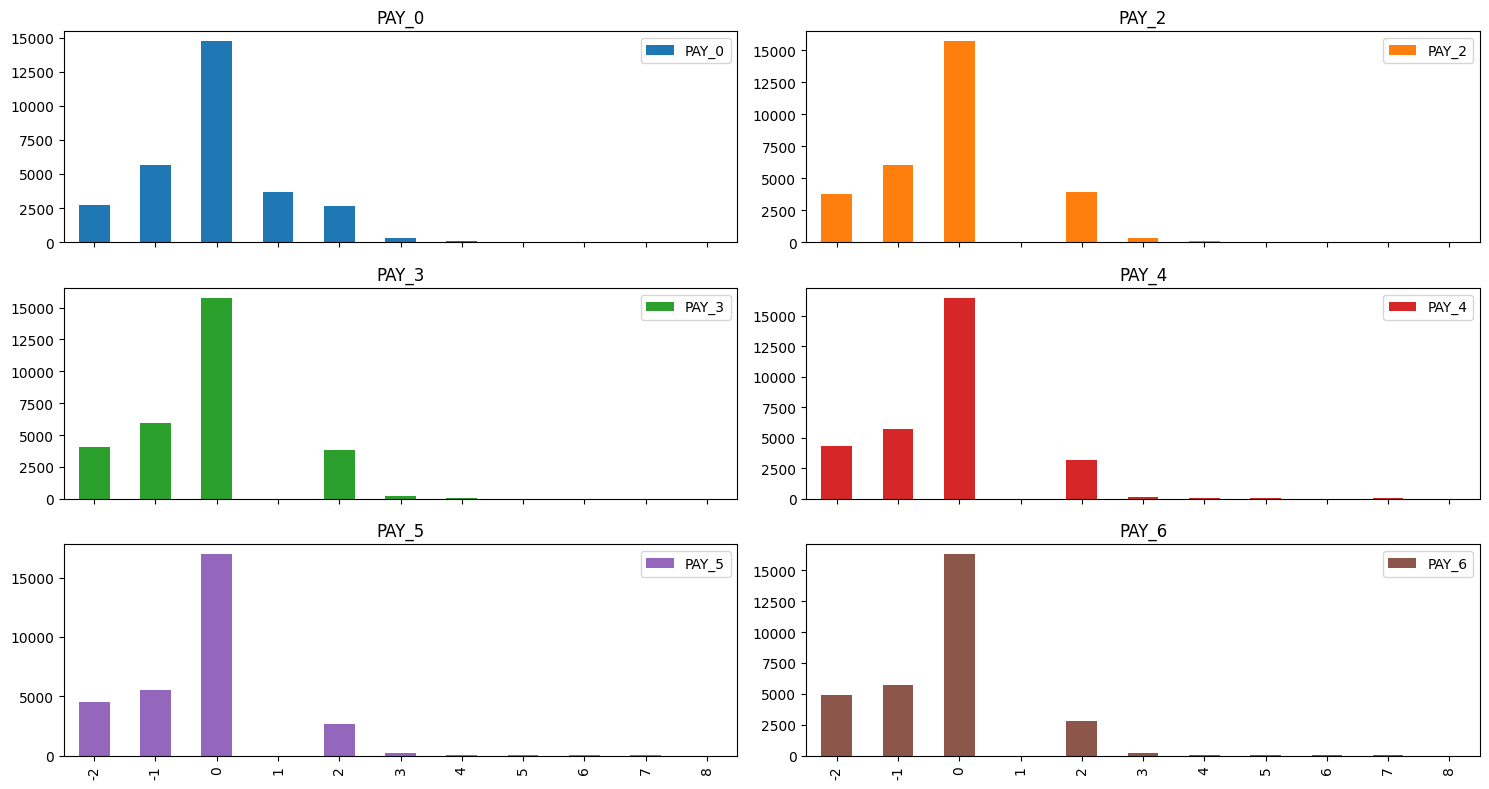

In [ ]:
# Payment status across different months
pay_status_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df[pay_status_columns].apply(pd.Series.value_counts).plot(kind='bar', figsize=(15, 8), subplots=True, layout=(3, 2))
plt.tight_layout()
plt.show()


Data Preprocessing

In [ ]:
# Define X and y
X = df.drop('default payment next month', axis=1)
y = df['default payment next month']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Scaling: SVM is sensitive to the scaling of the data, so it's crucial to scale features.


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Reshape Data for Conv1D: Data needs to be reshaped into a 3D format as Conv1D expects data in (batch, steps, channels) format.

In [ ]:
# Reshape for Conv1D
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

Model Implementation: Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Model Implementation: SVM

In [ ]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

Model Implementation: Conv1D

In [ ]:
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/10
750/750 [==============================] - 2s 2ms/step - loss: 0.4621 - accuracy: 0.8067 - val_loss: 0.4539 - val_accuracy: 0.8087
Epoch 2/10
750/750 [==============================] - 1s 1ms/step - loss: 0.4452 - accuracy: 0.8146 - val_loss: 0.4415 - val_accuracy: 0.8170
Epoch 3/10
750/750 [==============================] - 1s 2ms/step - loss: 0.4429 - accuracy: 0.8162 - val_loss: 0.4433 - val_accuracy: 0.8213
Epoch 4/10
750/750 [==============================] - 1s 1ms/step - loss: 0.4401 - accuracy: 0.8183 - val_loss: 0.4492 - val_accuracy: 0.8157
Epoch 5/10
750/750 [==============================] - 1s 1ms/step - loss: 0.4397 - accuracy: 0.8165 - val_loss: 0.4408 - val_accuracy: 0.8138
Epoch 6/10
750/750 [==============================] - 1s 2ms/step - loss: 0.4381 - accuracy: 0.8187 - val_loss: 0.4386 - val_accuracy: 0.8177
Epoch 7/10
750/750 [==============================] - 1s 1ms/step - loss: 0.4375 - accuracy: 0.8170 - val_loss: 0.4394 - val_accuracy: 0.8202
Epoch 

Evaluation Using 10-Fold Cross-Validation for Random Forest and SVM

In [ ]:
# Random Forest
rf_cv_scores = cross_val_score(random_forest, X_train, y_train, cv=10)
# SVM
svm_cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=10)

In [ ]:
rf_cv_scores, svm_cv_scores

(array([0.80708333, 0.82625   , 0.82583333, 0.82708333, 0.81541667,
        0.82458333, 0.82291667, 0.81833333, 0.81541667, 0.81333333]),
 array([0.8125    , 0.82583333, 0.8275    , 0.82333333, 0.81583333,
        0.82      , 0.82166667, 0.81333333, 0.82583333, 0.81291667]))

Setting Up 10-Fold Cross-Validation Manually for Conv1D

In [ ]:
# Initialize the K-Fold Cross-Validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# Perform the Fold Training and Validation
fold_no = 1
acc_per_fold = []
loss_per_fold = []

for train, test in kfold.split(X_train_scaled, y_train):
    # Reshape data for Conv1D input
    X_train_fold = X_train_scaled[train].reshape(-1, X_train_scaled.shape[1], 1)
    X_test_fold = X_train_scaled[test].reshape(-1, X_train_scaled.shape[1], 1)
    y_train_fold = y_train.iloc[train]
    y_test_fold = y_train.iloc[test]

    # Define the model architecture
    model = Sequential([
        Conv1D(64, 3, activation='relu', input_shape=(X_train_fold.shape[1], 1)),
        Flatten(),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Fit the model
    history = model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)

    # Evaluate the model
    scores = model.evaluate(X_test_fold, y_test_fold, verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no += 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Score for fold 1: accuracy of 82.12500214576721%
Score for fold 2: accuracy of 81.5833330154419%
Score for fold 3: accuracy of 82.08333253860474%
Score for fold 4: accuracy of 82.4583351612091%
Score for fold 5: accuracy of 82.12500214576721%
Score for fold 6: accuracy of 81.74999952316284%
Score for fold 7: accuracy of 82.08333253860474%
Score for fold 8: accuracy of 81.49999976158142%
Score for fold 9: accuracy of 80.9166669845581%
Score for fold 10: accuracy of 82.08333253860474%
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.4331299364566803 - Accuracy: 82.12500214576721%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.4332263171672821 - Accuracy: 81.5833330154419%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.4356898069381714 - Accuracy: 82.08333253860474%
-----

Evaluation Metrics: SVM and Random Forest

In [ ]:
# Predictions
rf_predictions = random_forest.predict(X_test)
svm_predictions = svm_model.predict(X_test_scaled)

# Random Forest Metrics
print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))

# SVM Metrics
print("SVM Metrics:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))

Random Forest Metrics:
Accuracy: 0.8136666666666666
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.63      0.36      0.46      1313

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000

Confusion Matrix:
 [[4413  274]
 [ 844  469]]
SVM Metrics:
Accuracy: 0.8185
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4687
           1       0.68      0.33      0.44      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.64      0.67      6000
weighted avg       0.80      0.82      0.79      6000

Confusion Matrix:
 [[4482  205]
 [ 884  429]]


Evaluation Metrics: Conv1D

In [ ]:
# Get predictions
conv1d_predictions = model.predict(X_test_reshaped)
conv1d_predictions = (conv1d_predictions > 0.5).astype(int)  # Thresholding probabilities to get binary output

# Conv1D Metrics
print("Conv1D Model Metrics:")
print("Accuracy:", accuracy_score(y_test, conv1d_predictions))
print(classification_report(y_test, conv1d_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, conv1d_predictions))

188/188 [==============================] - 0s 872us/step
Conv1D Model Metrics:
Accuracy: 0.8205
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.66      0.36      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000

Confusion Matrix:
 [[4447  240]
 [ 837  476]]


Confusion Matrix Visualization

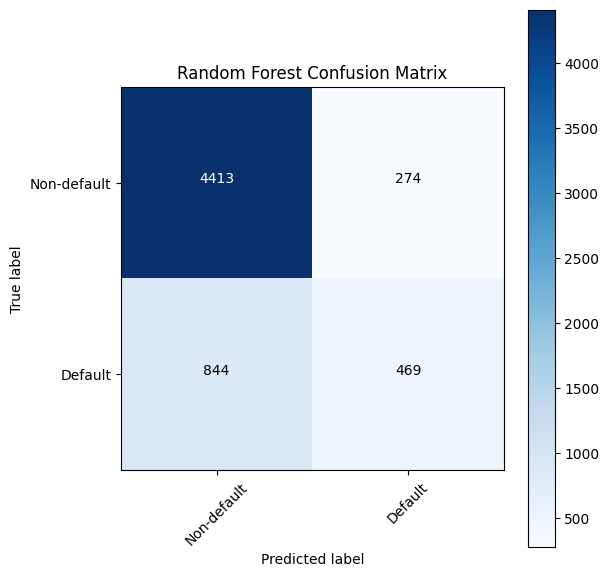

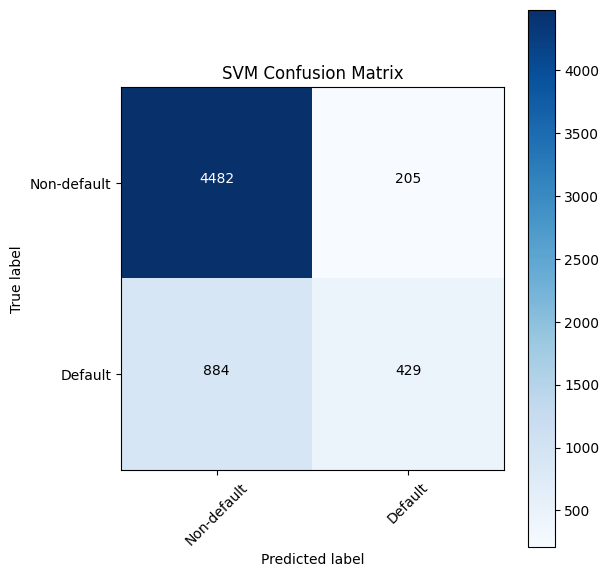

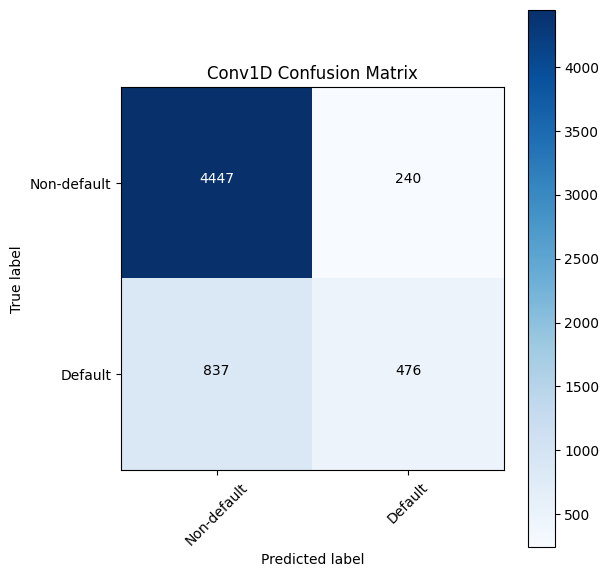

In [ ]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    # Use np.ndenumerate for iterating over the array elements
    for (i, j), val in np.ndenumerate(cm):
        plt.text(j, i, f"{val}", # use f-string for formatting
                 horizontalalignment="center",
                 color="white" if val > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Random Forest
rf_cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(6,6))
plot_confusion_matrix(rf_cm, classes=['Non-default', 'Default'], title='Random Forest Confusion Matrix')
plt.show()

# SVM
sv_cm = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(6,6))
plot_confusion_matrix(sv_cm, classes=['Non-default', 'Default'], title='SVM Confusion Matrix')
plt.show()

# Conv1D
conv1d_cm = confusion_matrix(y_test, conv1d_predictions)
plt.figure(figsize=(6,6))
plot_confusion_matrix(conv1d_cm, classes=['Non-default', 'Default'], title='Conv1D Confusion Matrix')
plt.show()


ROC Curve and AUC

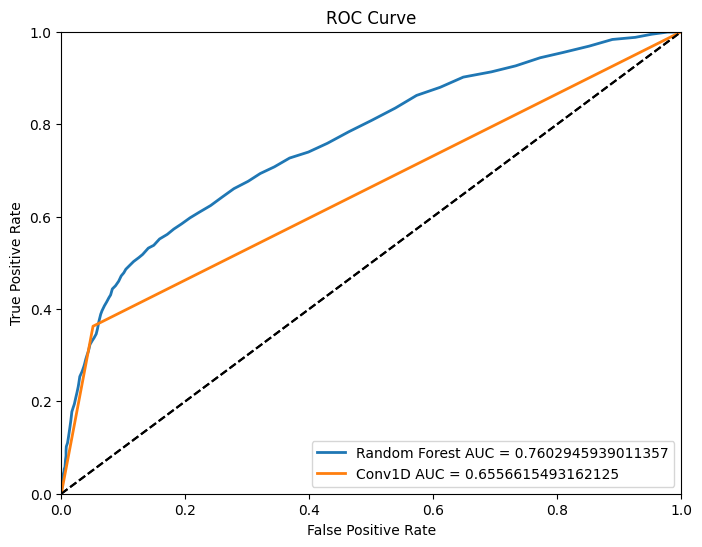

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label + " AUC = " + str(auc(fpr, tpr)))
    plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")

# Random Forest ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, random_forest.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_rf, tpr_rf, 'Random Forest')

# For Conv1D, assuming predictions are probabilities
fpr_conv1d, tpr_conv1d, thresholds_conv1d = roc_curve(y_test, conv1d_predictions.ravel())
plot_roc_curve(fpr_conv1d, tpr_conv1d, 'Conv1D')

plt.show()